In [1]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import datetime
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import csv

pd.set_option('display.max_rows', 100000)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Importing dataset
country_data_df = pd.read_csv(r"C:\Users\muthukumar\Desktop\005_SaveNWBCSHere\03_Activities&HW\07-git\Project-1_Healthcare\who-covid-19-global-data-csv-2.csv")
#country_data_df.head()
#Drop rows with NaN values
country_data_df = country_data_df.dropna(how='any')
#country_data_df.head()
#len(country_data_df)
#country_data = country_data_df.groupby([' Country'])

country_data_grp = country_data_df.groupby(['Country'])
country_data_grp_df = country_data_grp[['New_cases','New_deaths']].sum()
#country_data_grp_df.head()
country_data_grp_c_df =country_data_grp_df [country_data_grp_df ['New_deaths'] >= 10000].sort_values(by = 'New_deaths', ascending = False)
#country_data_grp_c_df

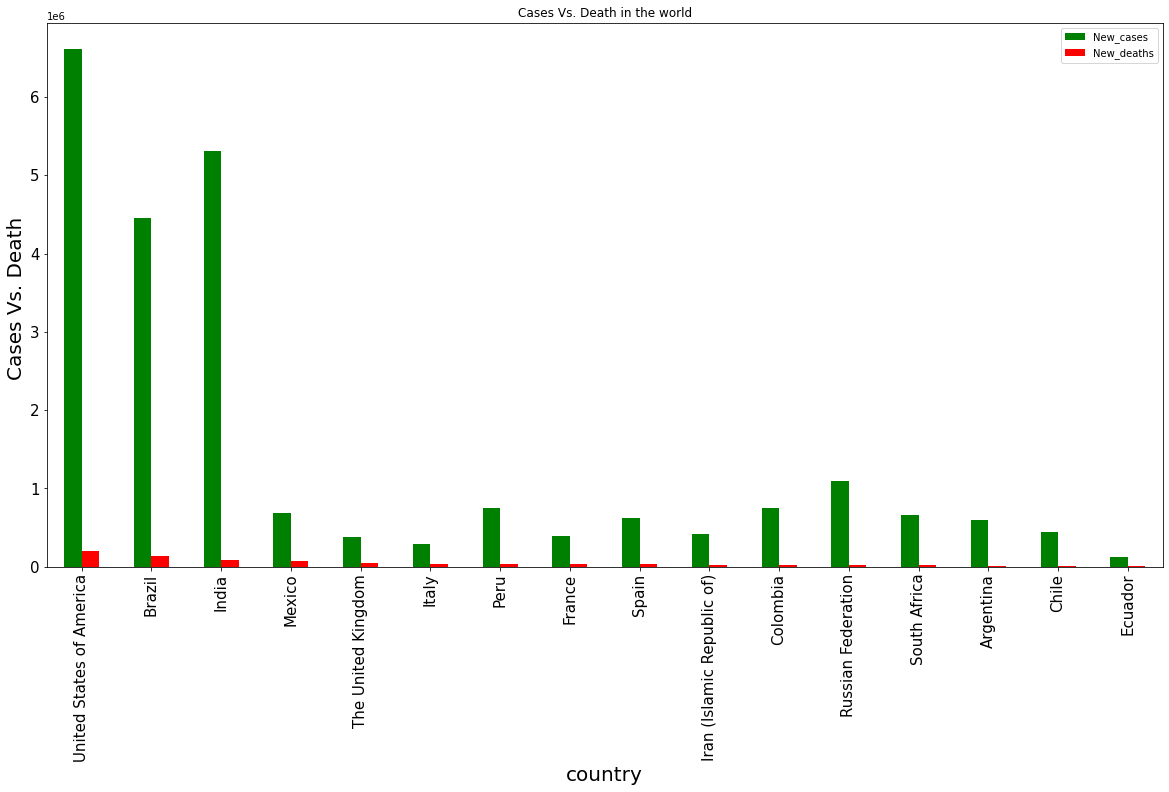

In [17]:
country_data_grp_c_df.plot(kind = 'bar',figsize=(20,10),fontsize=15, color=['green','red'])
plt.title("Cases Vs. Death in the world")
plt.xlabel("country",fontsize=20 )
plt.ylabel("Cases Vs. Death ",fontsize=20)
plt.legend(loc="best")


In [3]:
#Importing dataset
data_df = pd.read_csv(r"C:\Users\muthukumar\Desktop\005_SaveNWBCSHere\03_Activities&HW\07-git\Project-1_Healthcare\USCounties.csv")
#data_df

In [12]:
#Cases,Deaths grouped by state
data_grouped = data_df.groupby('state')
data_grouped_df = data_grouped['deaths', 'cases'].max()
#data_grouped_df
data_grouped_c_df = data_grouped_df[data_grouped_df['deaths'] >= 500].sort_values(by = 'deaths', ascending = False)
data_grouped_f_df = data_grouped_c_df.reset_index()
#data_grouped_f_df
data_grouped_c_df = data_grouped_f_df[:15]
data_grouped_f_df = data_grouped_c_df.set_index("state")
#data_grouped_f_df

Text(0, 0.5, 'Cases Vs. Death ')

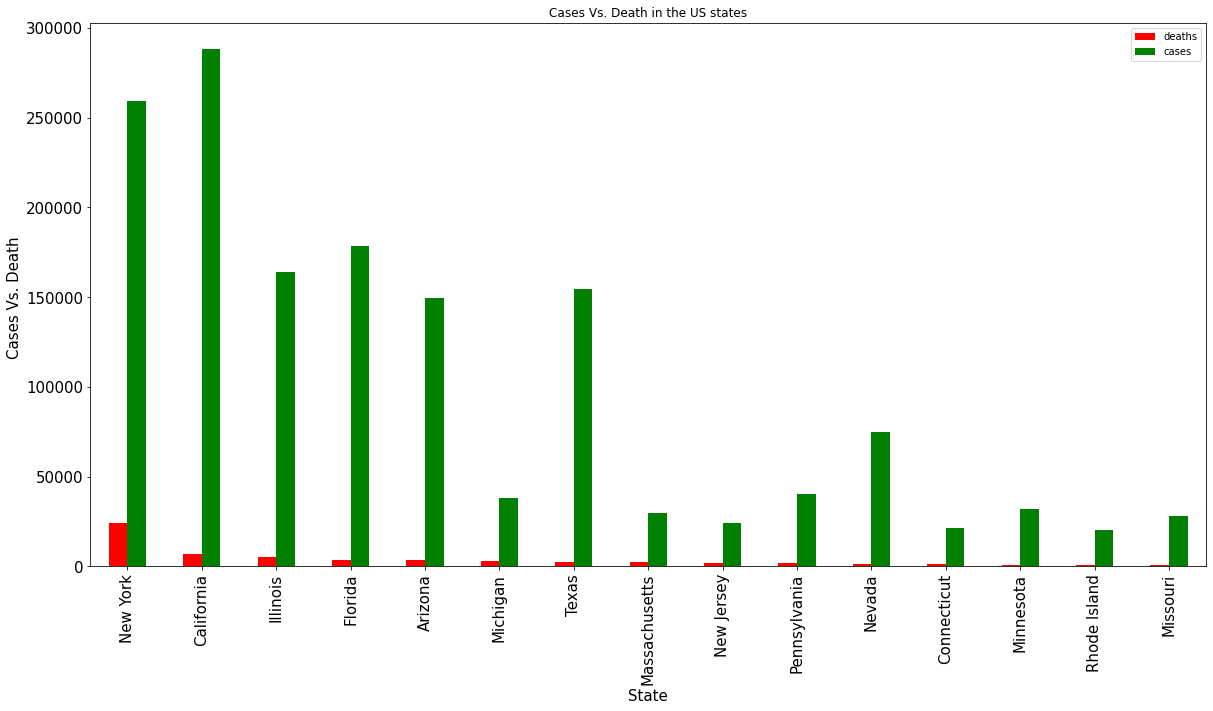

In [16]:
data_grouped_f_df.plot(kind = 'bar',figsize=(20,10),fontsize=15, color=['red','green'])
plt.title("Cases Vs. Death in the US states")
plt.xlabel("State", fontsize = 15)
plt.ylabel("Cases Vs. Death ", fontsize = 15)

In [18]:
#Importing data set
conditions_df = pd.read_csv(r"C:\Users\muthukumar\Desktop\005_SaveNWBCSHere\03_Activities&HW\07-git\Project-1_Healthcare\Conditions_contributing_to_deaths_involving_coronavirus_disease_2019__COVID-19___by_age_group_and_state__United_States.csv")
conditions_r_df = conditions_df[['Condition Group', 'Condition', 'Age Group', 'Number of COVID-19 Deaths']]
subset_conditions_r_df = conditions_r_df[conditions_r_df['Condition Group'].isin(['Respiratory diseases', 'COVID-19']) ]                             
#subset_conditions_r_df.head()
#Convert float type data into integer
subset_conditions_r_df['Number of COVID-19 Deaths'] = subset_conditions_r_df['Number of COVID-19 Deaths'].fillna(0).astype(np.int64)
#print (conditions_r_df['Number of COVID-19 Deaths'])
subset_conditions_f_df = subset_conditions_r_df.drop(['Age Group'], axis = 1)
#subset_conditions_f_df.head()
#Drop rows with NaN values
subset_conditions_f_df = subset_conditions_r_df.dropna(how='all')
subset_conditions_f_df
len(subset_conditions_f_df)

3730

In [23]:
#Finding distribution of data between different observations
datadistribution = subset_conditions_f_df['Condition'].value_counts()
datadistribution

Adult respiratory distress syndrome         540
COVID-19                                    540
Respiratory failure                         540
Influenza and pneumonia                     540
Other diseases of the respiratory system    540
Chronic lower respiratory diseases          540
Respiratory arrest                          490
Name: Condition, dtype: int64

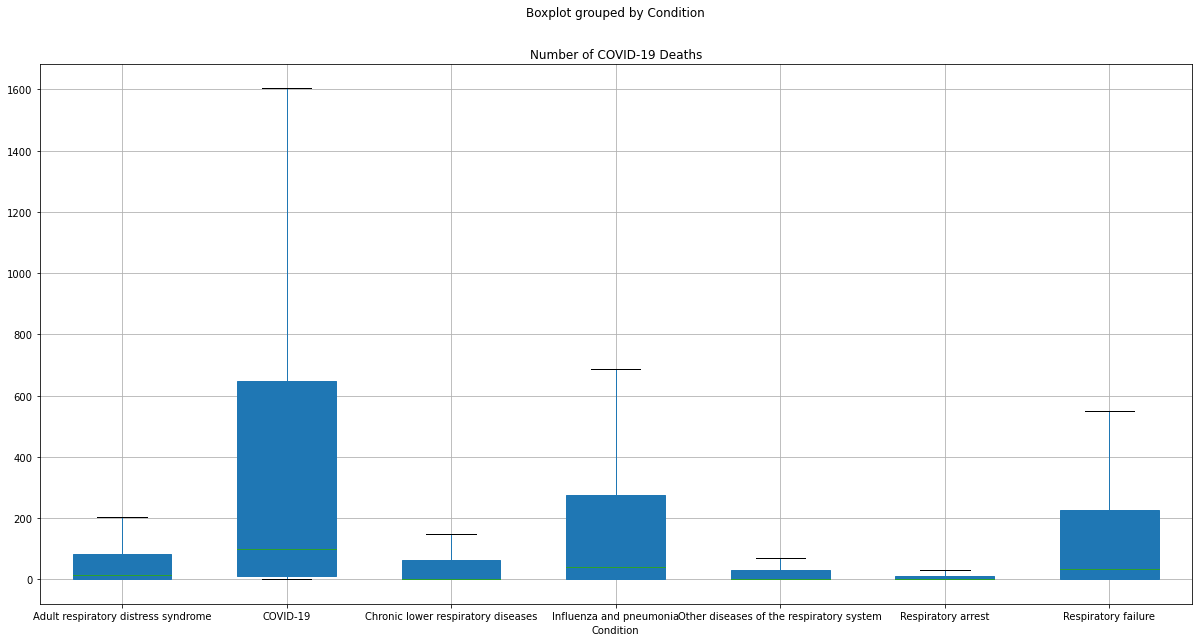

In [19]:
# Create a boxplot to compare means
subset_conditions_f_df.boxplot("Number of COVID-19 Deaths", by="Condition", widths=0.6, showfliers=False, patch_artist = True, figsize=(20, 10))

In [20]:
#Extract individual groups
group1 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "Adult respiratory distress syndrome"]["Number of COVID-19 Deaths"]
group2 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "COVID-19"]["Number of COVID-19 Deaths"]
group3 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "Chronic lower respiratory diseases"]["Number of COVID-19 Deaths"]
group4 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "Influenza and pneumonia"]["Number of COVID-19 Deaths"]
group5 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "Other diseases of the respiratory system"]["Number of COVID-19 Deaths"]
group6 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "Respiratory arrest"]["Number of COVID-19 Deaths"]
group7 = subset_conditions_f_df[subset_conditions_f_df["Condition"] == "Respiratory failure"]["Number of COVID-19 Deaths"]

In [21]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=7.924999382073871, pvalue=1.649647099121164e-08)

In [24]:
# the means of conditions Adult resp distress synd.,  Influenza and Pneumonia, Respiratory failure 
stats.f_oneway(group4, group7)

F_onewayResult(statistic=0.2844471615412199, pvalue=0.5939110320356396)

In [25]:
#Considering number of Deaths due to the observed 2 categorical values for the chi2 test of independance. 
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_data_df = subset_conditions_f_df.groupby(['Condition'])
grouped_data_df["Number of COVID-19 Deaths"].max()
pie_grouped_data = grouped_data_df["Number of COVID-19 Deaths"].max()
pie_grouped_data_df = pd.DataFrame(pie_grouped_data)
pie_grouped_data_df

,Number of COVID-19 Deaths
Condition,
Adult respiratory distress syndrome,27141
COVID-19,210326
Chronic lower respiratory diseases,18421
Influenza and pneumonia,91153
Other diseases of the respiratory system,7966
Respiratory arrest,4280
Respiratory failure,73703


In [26]:
observed = pd.Series([91153, 73703], index=["Influenza and pneumonia", "Respiratory failure"])
# Create a data frame
conditions_a_df = pd.DataFrame([observed]).T
#conditions_a_df
# Add a column whose default values are the expected values
conditions_a_df[1] = 100000
# Rename columns
conditions_a_df.columns = ["observed", "expected"]
conditions_a_df

,observed,expected
Influenza and pneumonia,91153,100000
Respiratory failure,73703,100000


In [27]:
# The degree of freedom is 2-1 = 1
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
critical_value

3.841458820694124

In [28]:
# Run the chi square test with stats.chisquare()
stats.chisquare(conditions_a_df['observed'], conditions_a_df['expected'])

Power_divergenceResult(statistic=7698.01618, pvalue=0.0)

In [ ]:
'''
Since the chi square value of 7698.02 exceeds the critical value of 3.84, we conclude that the results are statistically significant.
'''